# Project Name: IPL Data Visualization  
# Develop By: Rudra Rathod
**Dataset Year**: 2008-2025

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
df = pd.read_csv('IPL.csv')
print(df.head())
print(f"Dataset shape: {df.shape}")

   Unnamed: 0  match_id        date match_type             event_name  \
0      131970    335982  2008-04-18        T20  Indian Premier League   
1      131971    335982  2008-04-18        T20  Indian Premier League   
2      131972    335982  2008-04-18        T20  Indian Premier League   
3      131973    335982  2008-04-18        T20  Indian Premier League   
4      131974    335982  2008-04-18        T20  Indian Premier League   

   innings           batting_team                 bowling_team  over  ball  \
0        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     1   
1        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     2   
2        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     3   
3        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     3   
4        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     4   

   ...  team_runs team_balls  team_wicket  new_batter  batter_runs  \
0  ...          1     

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 64 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         278205 non-null  int64  
 1   match_id           278205 non-null  int64  
 2   date               278205 non-null  object 
 3   match_type         278205 non-null  object 
 4   event_name         278205 non-null  object 
 5   innings            278205 non-null  int64  
 6   batting_team       278205 non-null  object 
 7   bowling_team       278205 non-null  object 
 8   over               278205 non-null  int64  
 9   ball               278205 non-null  int64  
 10  ball_no            278205 non-null  float64
 11  batter             278205 non-null  object 
 12  bat_pos            278205 non-null  int64  
 13  runs_batter        278205 non-null  int64  
 14  balls_faced        278205 non-null  int64  
 15  bowler             278205 non-null  object 
 16  va

# Top 10 Run Scorers - IPL

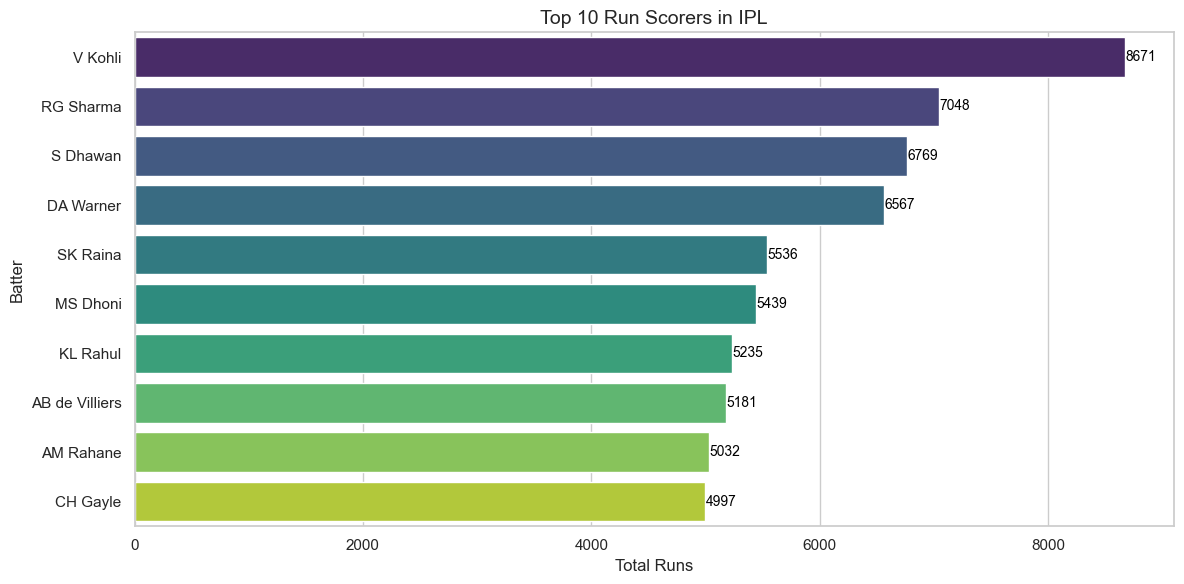

In [98]:
sns.set(style="whitegrid")
top_batters = df.groupby('batter')['runs_batter'].sum().reset_index()
top_batters = top_batters.sort_values(by='runs_batter', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_batters, x='runs_batter', y='batter', palette='viridis')
for bar in ax.patches:
    plt.text(bar.get_width() + 5,                  
             bar.get_y() + bar.get_height() / 2,   
             int(bar.get_width()),                 
             fontsize=10, color='black', va='center')
plt.title('Top 10 Run Scorers in IPL', fontsize=14)
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

# Top 10 Batting Averages (Min 2000 Runs Scored) - IPL

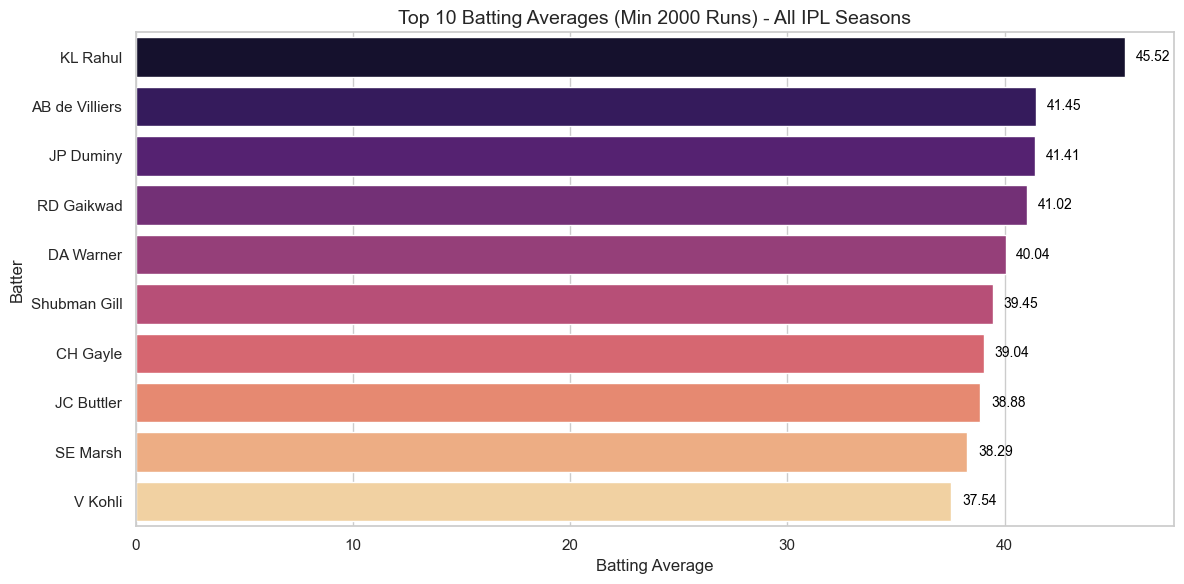

In [99]:
batting_stats = df.groupby('batter').agg({
    'runs_batter': 'sum',
    'balls_faced': 'sum',
    'player_out': lambda x: x.notnull().sum()  # count dismissals
}).reset_index()
batting_stats.rename(columns={
    'runs_batter': 'total_runs',
    'balls_faced': 'total_balls',
    'player_out': 'dismissals'
}, inplace=True)
batting_stats = batting_stats[batting_stats['total_runs'] >= 2000]
batting_stats['dismissals'] = batting_stats['dismissals'].replace(0, 1)
batting_stats['batting_average'] = batting_stats['total_runs'] / batting_stats['dismissals']
top_avg = batting_stats.sort_values(by='batting_average', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=top_avg, x='batting_average', y='batter', palette='magma')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}", fontsize=10, va='center', color='black')
plt.title('Top 10 Batting Averages (Min 2000 Runs) - All IPL Seasons', fontsize=14)
plt.xlabel('Batting Average')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

# Top 10 Strike Rates (Min 2000 Runs Scored) - IPL

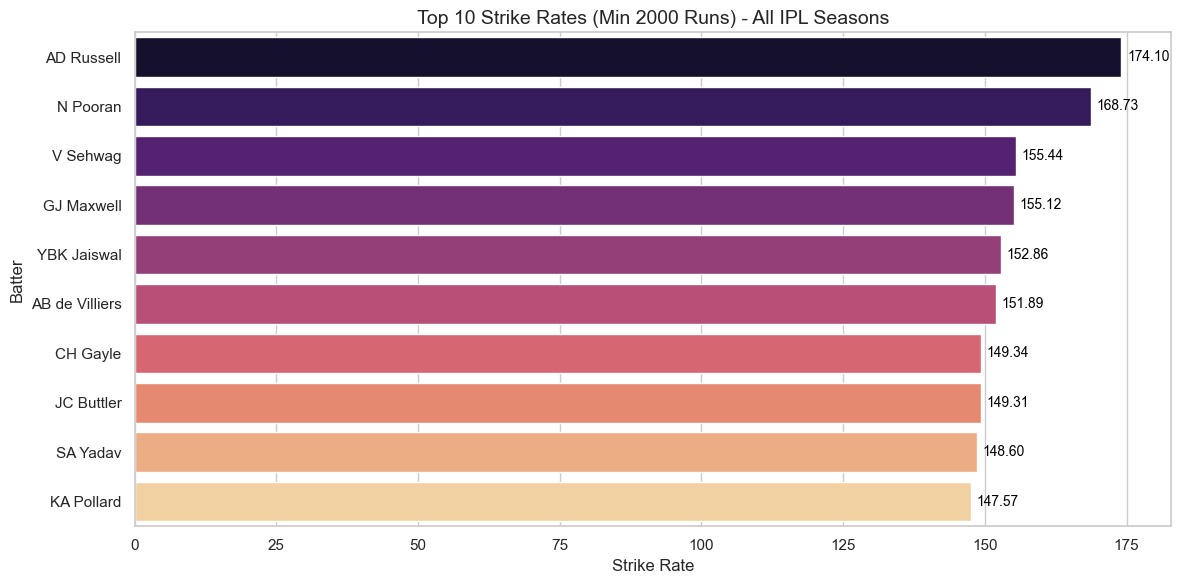

In [100]:
valid_balls = df[df['extra_type'] != 'wides']
batter_stats = valid_balls.groupby('batter').agg(
    total_runs=('runs_batter', 'sum'),
    balls_faced=('batter', 'count') 
).reset_index()
batter_stats = batter_stats[batter_stats['total_runs'] >= 2000]
batter_stats['strike_rate'] = (batter_stats['total_runs'] / batter_stats['balls_faced']) * 100
top_strike_rates = batter_stats.sort_values(by='strike_rate', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=top_strike_rates, x='strike_rate', y='batter', palette='magma')
for bar in ax.patches:
    plt.text(bar.get_width() + 1, 
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}", 
             va='center', fontsize=10, color='black')
plt.title('Top 10 Strike Rates (Min 2000 Runs) - All IPL Seasons', fontsize=14)
plt.xlabel('Strike Rate')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

# Top 10 Batters with Most Fours - IPL 


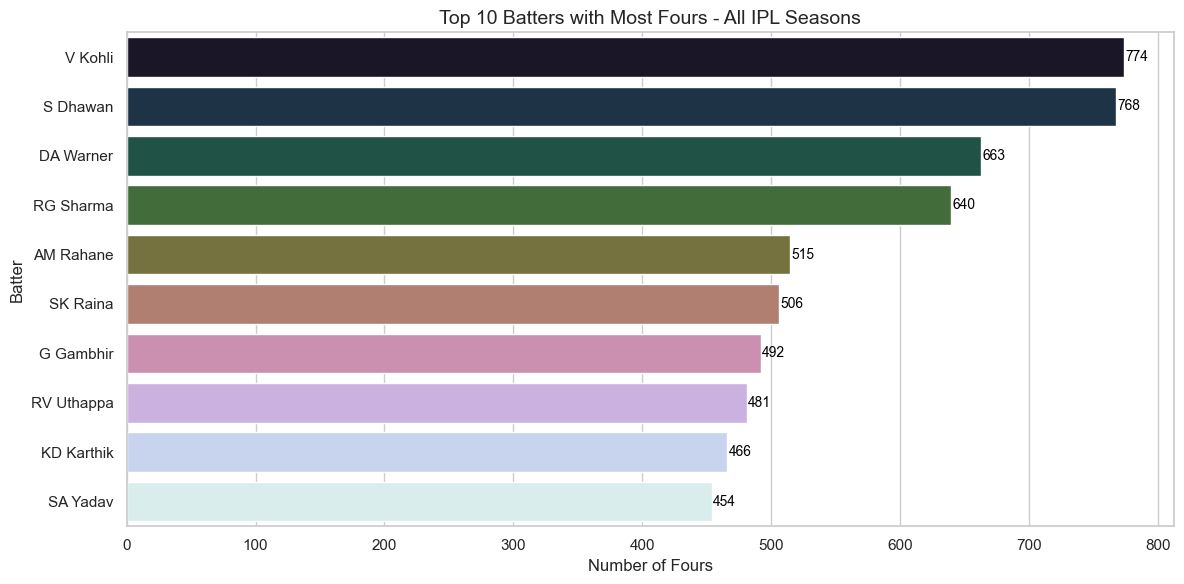

In [101]:
fours_df = df[df['runs_batter'] == 4]
fours_count = fours_df.groupby('batter').size().reset_index(name='fours')
top_fours = fours_count.sort_values(by='fours', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=top_fours, x='fours', y='batter', palette='cubehelix')
for bar in ax.patches:
    plt.text(bar.get_width() + 1,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=10, color='black')
plt.title('Top 10 Batters with Most Fours - All IPL Seasons', fontsize=14)
plt.xlabel('Number of Fours')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

# Top 10 Batters with Most Sixes - IPL

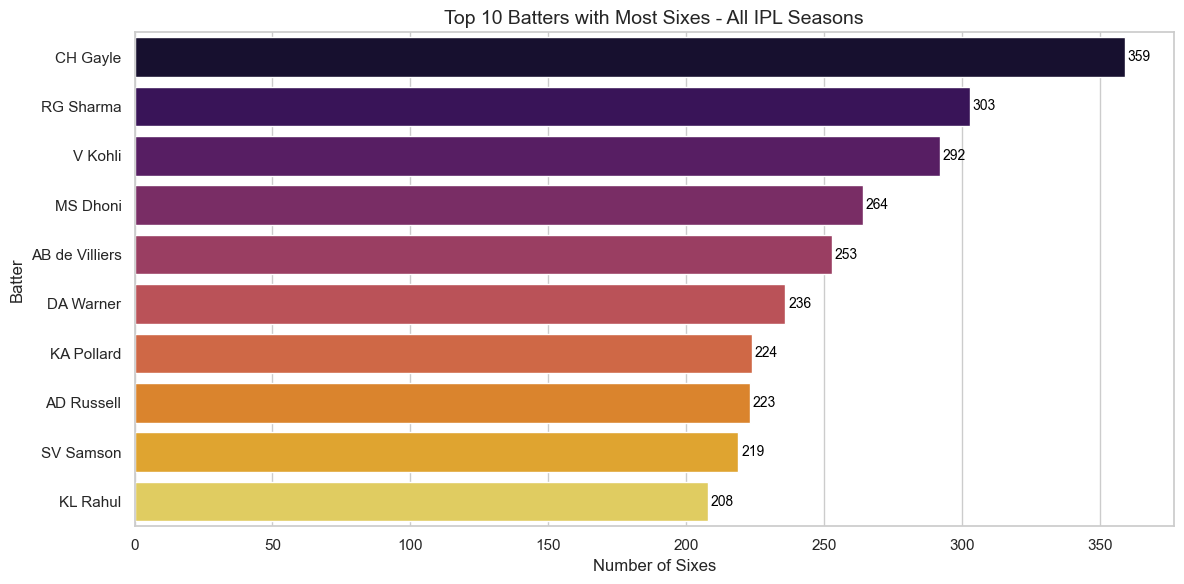

In [102]:
sixes_df = df[df['runs_batter'] == 6]
sixes_count = sixes_df.groupby('batter').size().reset_index(name='sixes')
top_sixes = sixes_count.sort_values(by='sixes', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=top_sixes, x='sixes', y='batter', palette='inferno')
for bar in ax.patches:
    plt.text(bar.get_width() + 1,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=10, color='black')
plt.title('Top 10 Batters with Most Sixes - All IPL Seasons', fontsize=14)
plt.xlabel('Number of Sixes')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

# Top Run Scorer for Each Over (1 to 20) - IPL 


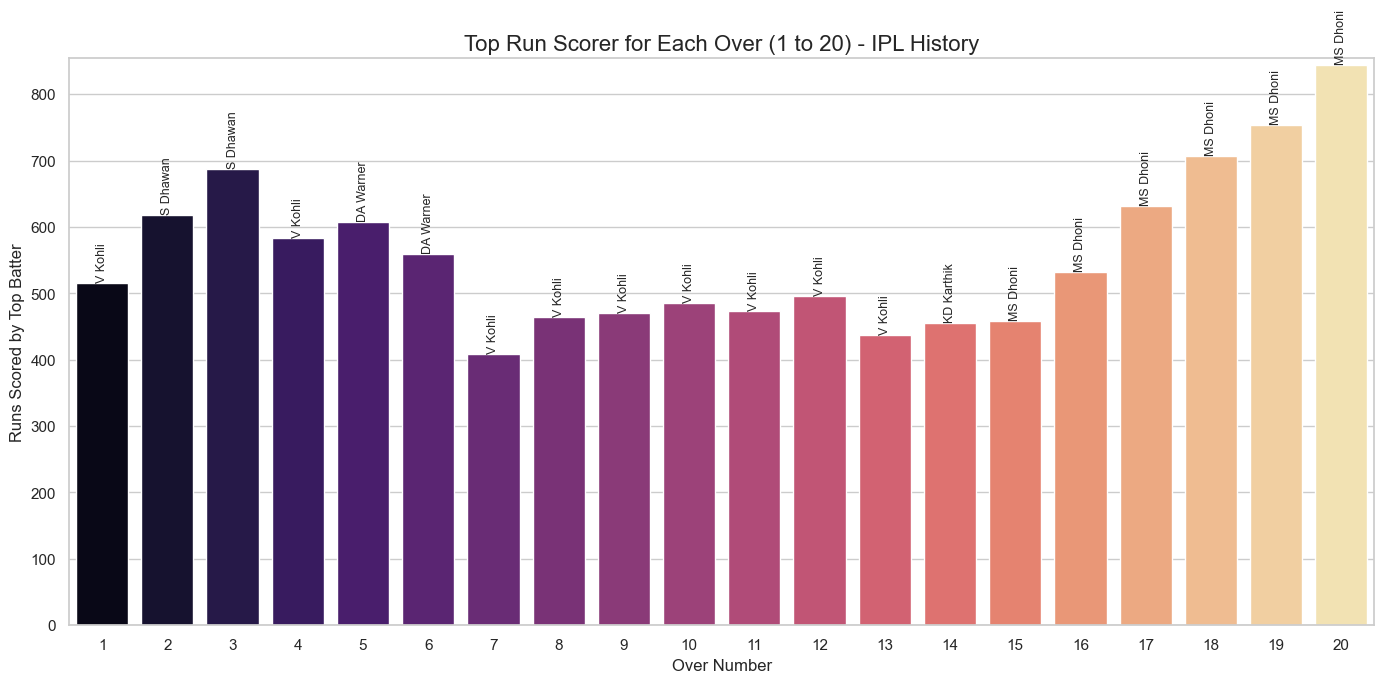

In [103]:
df['over_int'] = df['over'].astype(float).apply(int)
df_1_20 = df[(df['over_int'] >= 0) & (df['over_int'] < 20)]
runs_per_over_batter = df_1_20.groupby(['over_int', 'batter'])['runs_batter'].sum().reset_index()
top_scorers_per_over = runs_per_over_batter.loc[
    runs_per_over_batter.groupby('over_int')['runs_batter'].idxmax()
].reset_index(drop=True)
top_scorers_per_over = top_scorers_per_over.sort_values('over_int')
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
ax = sns.barplot(data=top_scorers_per_over, x='over_int', y='runs_batter', palette='magma')
for index, row in top_scorers_per_over.iterrows():
    ax.text(row['over_int'],                
            row['runs_batter'] + 1,         
            row['batter'],                  
            rotation=90, fontsize=9, ha='center', va='bottom')
plt.title('Top Run Scorer for Each Over (1 to 20) - IPL History', fontsize=16)
plt.xlabel('Over Number')
plt.ylabel('Runs Scored by Top Batter')
plt.xticks(ticks=range(20), labels=range(1, 21))
plt.ylim(0, top_scorers_per_over['runs_batter'].max() + 10)
plt.tight_layout()
plt.show()

# Top 10 Wicket Takers - IPL

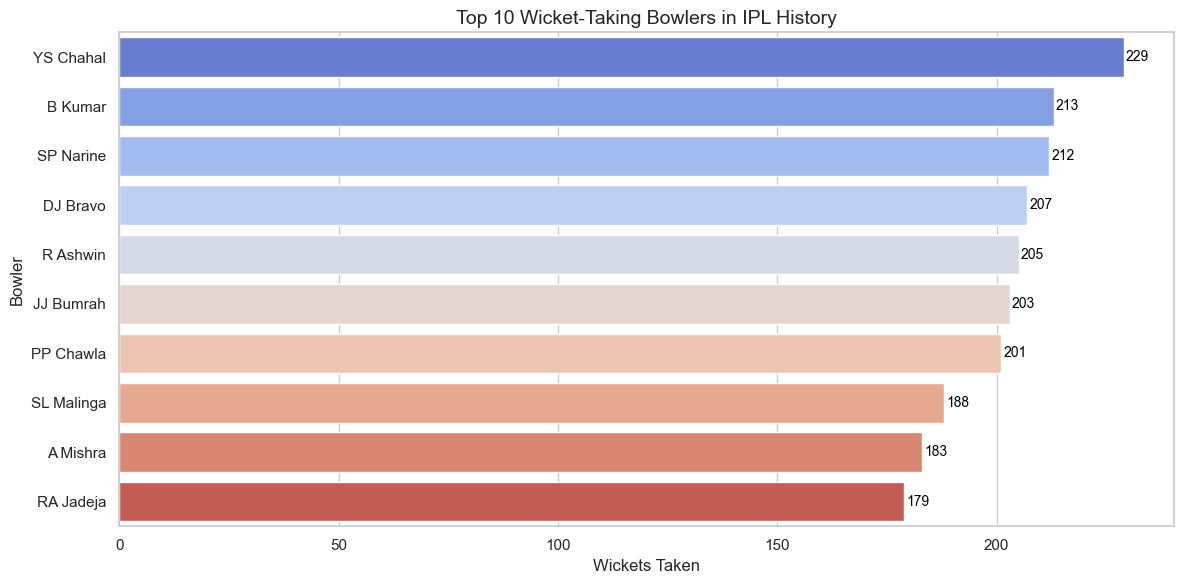

In [104]:
wickets_per_bowler = df[df['player_out'].notnull()].groupby('bowler').size().reset_index(name='wickets')
top_bowlers = wickets_per_bowler.sort_values(by='wickets', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=top_bowlers, x='wickets', y='bowler', palette='coolwarm')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=10, color='black')
plt.title('Top 10 Wicket-Taking Bowlers in IPL History', fontsize=14)
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

# Top 10 Best Bowling Averages (Min 50 Wickets) - IPL

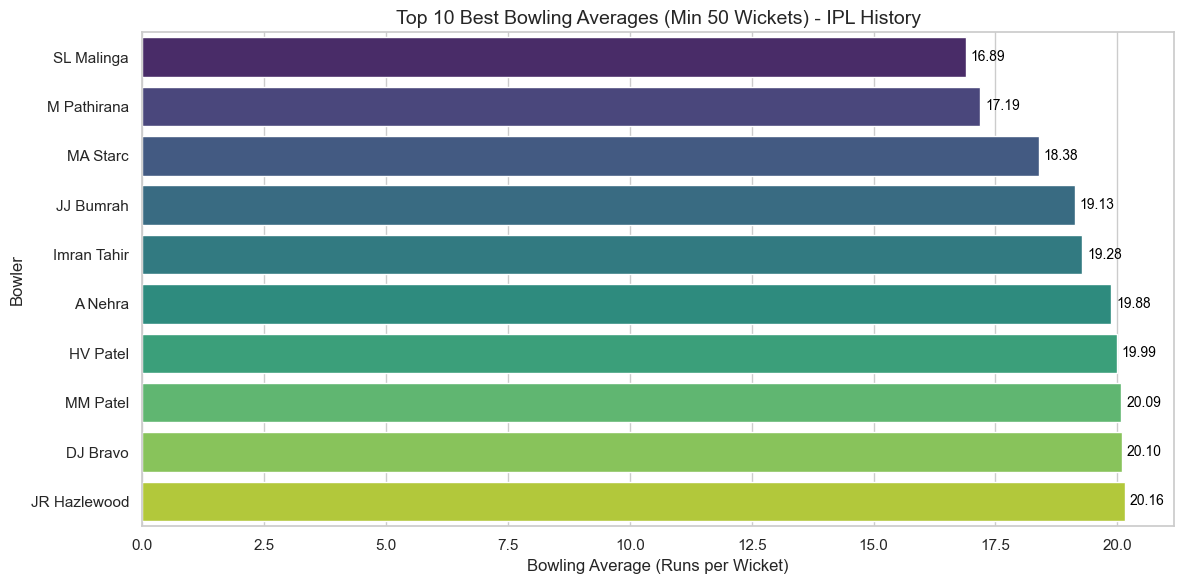

In [105]:
valid_balls = df[(df['valid_ball'] == 1) | (df['valid_ball'] == True)]  
runs_conceded = valid_balls.groupby('bowler')['runs_bowler'].sum().reset_index()
wickets = df[df['player_out'].notnull()].groupby('bowler').size().reset_index(name='wickets')
bowling_stats = pd.merge(runs_conceded, wickets, on='bowler', how='inner')
bowling_stats = bowling_stats[bowling_stats['wickets'] >= 50]
bowling_stats['bowling_average'] = bowling_stats['runs_bowler'] / bowling_stats['wickets']
top_bowlers_avg = bowling_stats.sort_values('bowling_average').head(10)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=top_bowlers_avg, x='bowling_average', y='bowler', palette='viridis')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.1,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}",
             va='center', fontsize=10, color='black')
plt.title('Top 10 Best Bowling Averages (Min 50 Wickets) - IPL History', fontsize=14)
plt.xlabel('Bowling Average (Runs per Wicket)')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

# Top 10 Best Bowling Figures in IPL Matches


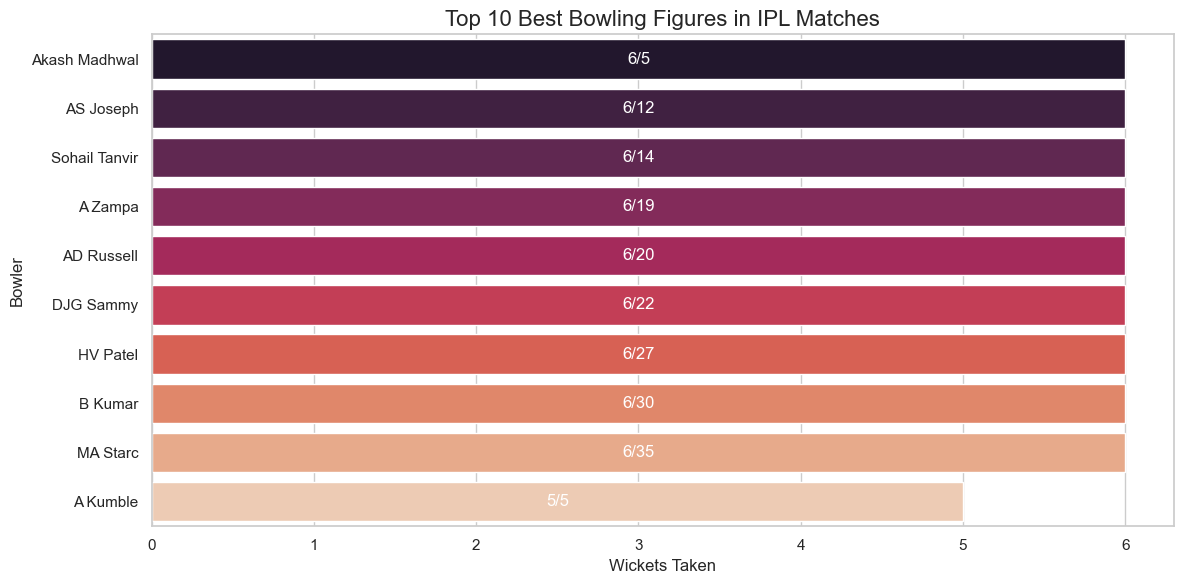

In [106]:
bowling_per_match = df.groupby(['match_id', 'bowler']).agg(
    runs_conceded=('runs_bowler', 'sum'),
    wickets=('player_out', lambda x: x.notnull().sum())
).reset_index()
bowling_per_match = bowling_per_match[bowling_per_match['wickets'] > 0]
best_figures = bowling_per_match.sort_values(
    by=['wickets', 'runs_conceded'],
    ascending=[False, True]
).head(10)
best_figures['figures'] = best_figures['wickets'].astype(str) + "/" + best_figures['runs_conceded'].astype(str)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=best_figures, x='wickets', y='bowler', palette='rocket')
for i, row in enumerate(best_figures.itertuples()):
    ax.text(row.wickets / 2, i, row.figures, color='white', ha='center', va='center', fontsize=12)
plt.title('Top 10 Best Bowling Figures in IPL Matches', fontsize=16)
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

# Top 10 Best Economy Rates (Min 50 Wickets)

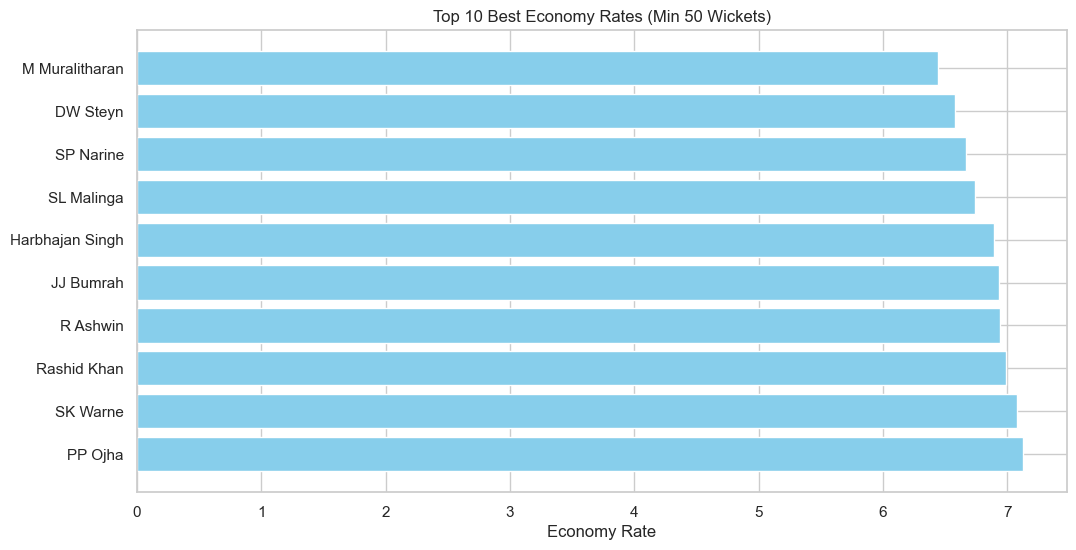

In [107]:
valid_balls = df[df['valid_ball'] == 1]
bowler_stats = valid_balls.groupby('bowler').agg({
    'runs_bowler': 'sum',               
    'ball_no': 'count',                 
    'player_out': lambda x: x.notnull().sum()  
}).rename(columns={'ball_no': 'balls_bowled', 'player_out': 'wickets'})
bowler_stats = bowler_stats[bowler_stats['wickets'] >= 50]
bowler_stats['economy_rate'] = bowler_stats['runs_bowler'] / (bowler_stats['balls_bowled'] / 6)
top10 = bowler_stats.sort_values('economy_rate').head(10)
plt.figure(figsize=(12,6))
plt.barh(top10.index, top10['economy_rate'], color='skyblue')
plt.xlabel('Economy Rate')
plt.title('Top 10 Best Economy Rates (Min 50 Wickets)')
plt.gca().invert_yaxis() 
plt.show()

# Top Wicket Taker for Each Over (1 to 20) - IPL 

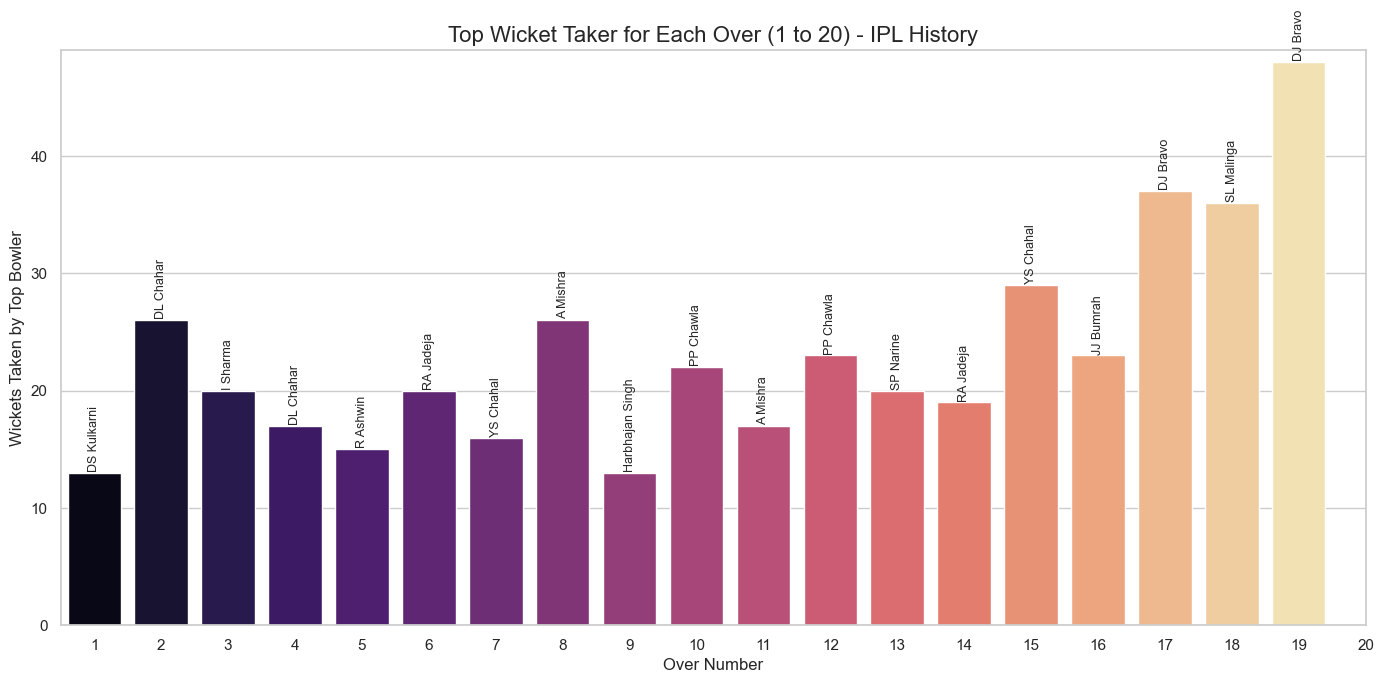

In [108]:
df['over_int'] = df['over'].astype(float).apply(int)
df_1_20 = df[(df['over_int'] >= 1) & (df['over_int'] <= 20)]
wickets = df_1_20[df_1_20['wicket_kind'].notna() & (df_1_20['wicket_kind'] != '')]
wicket_counts = wickets.groupby(['over_int', 'bowler']).size().reset_index(name='wickets')
top_wicket_takers = wicket_counts.loc[wicket_counts.groupby('over_int')['wickets'].idxmax()].reset_index(drop=True)
top_wicket_takers = top_wicket_takers.sort_values('over_int')
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
ax = sns.barplot(data=top_wicket_takers, x='over_int', y='wickets', palette='magma')
for index, row in top_wicket_takers.iterrows():
    ax.text(row['over_int'] - 1,          
            row['wickets'] + 0.1,        
            row['bowler'],               
            rotation=90, fontsize=9, ha='center', va='bottom')
plt.title('Top Wicket Taker for Each Over (1 to 20) - IPL History', fontsize=16)
plt.xlabel('Over Number')
plt.ylabel('Wickets Taken by Top Bowler')
plt.xticks(ticks=range(20), labels=range(1, 21))
plt.ylim(0, top_wicket_takers['wickets'].max() + 1)
plt.tight_layout()
plt.show()

# Top 10 Fielders with Most Catches - IPL 

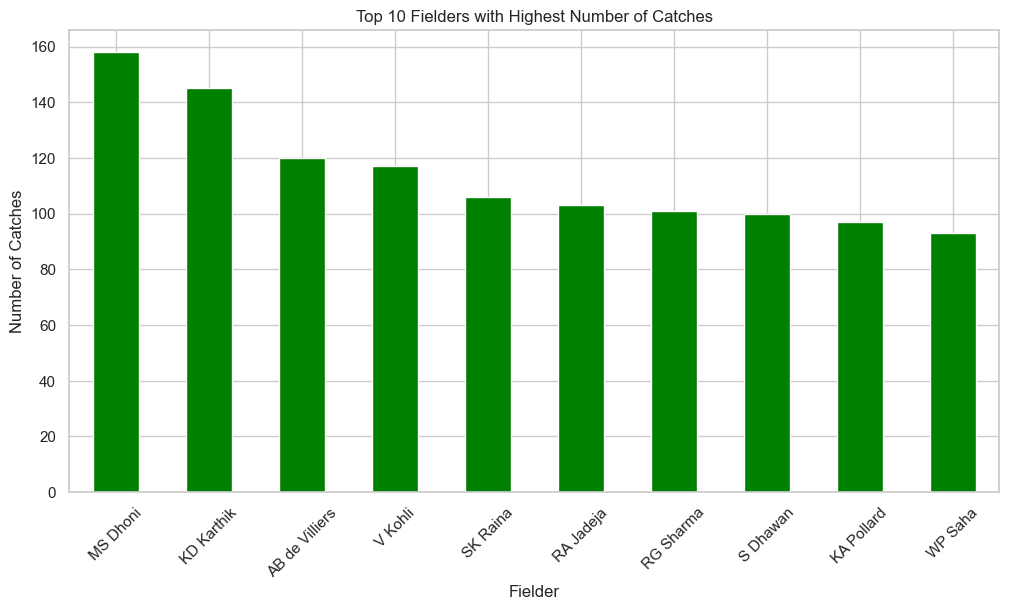

In [109]:
caught_df = df[df['wicket_kind'].str.contains('caught', case=False, na=False)]
fielders_series = caught_df['fielders'].dropna().str.split(',')
all_fielders = [fielder.strip() for sublist in fielders_series for fielder in sublist]
fielder_counts = pd.Series(all_fielders).value_counts()
top10_fielders = fielder_counts.head(10)
plt.figure(figsize=(12,6))
top10_fielders.plot(kind='bar', color='green')
plt.title('Top 10 Fielders with Highest Number of Catches')
plt.xlabel('Fielder')
plt.ylabel('Number of Catches')
plt.xticks(rotation=45)
plt.show()

# Top 10 Wicket-Keepers by Total Dismissals (Stumping, Catch, Run Out) - IPL 

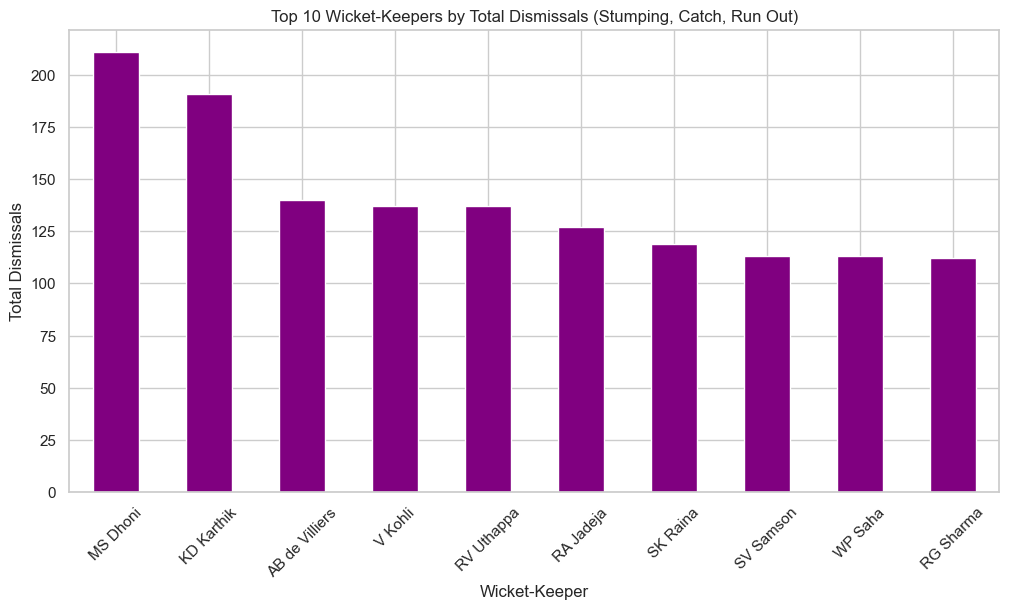

In [110]:
keeper_dismissals = df[df['wicket_kind'].str.lower().isin(['stumping', 'caught', 'run out'])]
keepers_involved = keeper_dismissals['fielders'].dropna().str.split(',')
all_keepers = [k.strip() for sublist in keepers_involved for k in sublist]
dismissals_count = pd.Series(all_keepers).value_counts()
top10_keepers = dismissals_count.head(10)
plt.figure(figsize=(12,6))
top10_keepers.plot(kind='bar', color='purple')
plt.title('Top 10 Wicket-Keepers by Total Dismissals (Stumping, Catch, Run Out)')
plt.xlabel('Wicket-Keeper')
plt.ylabel('Total Dismissals')
plt.xticks(rotation=45)
plt.show()

# Total Runs Scored by Teams - IPL 

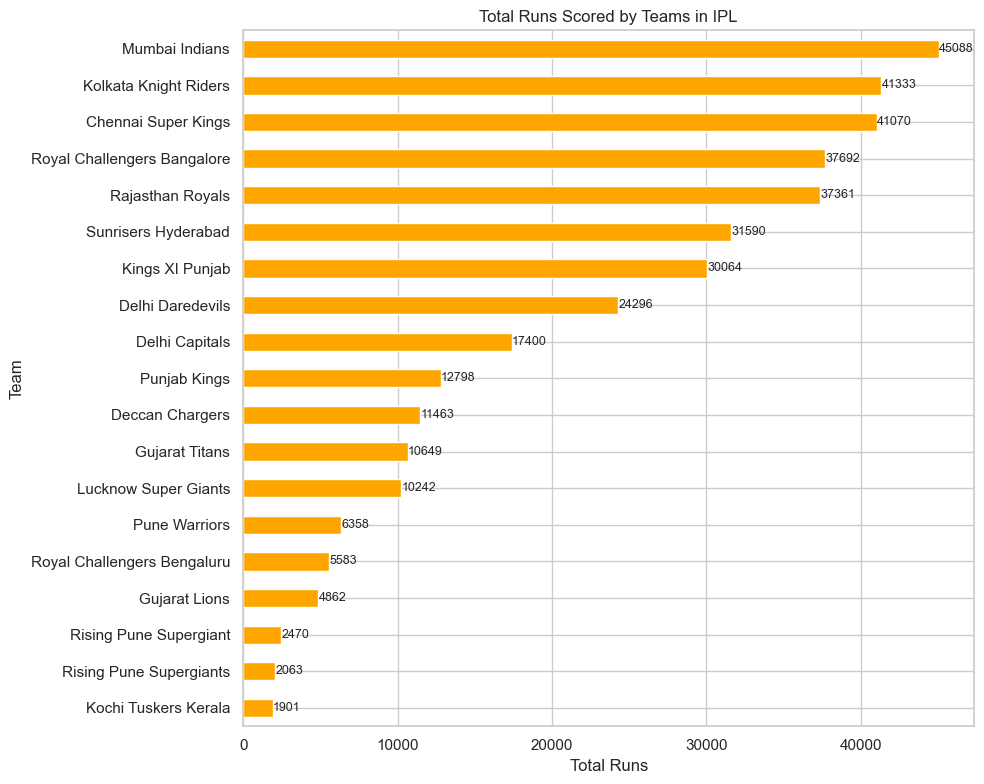

In [111]:
ipl_df = df[df['event_name'].str.contains('IPL|Indian Premier League', case=False, na=False)]
if ipl_df.empty:
    print("No IPL matches found in your dataset.")
else:
    team_runs = ipl_df.groupby('batting_team')['runs_total'].sum().sort_values(ascending=True)  
    plt.figure(figsize=(10, 8))
    ax = team_runs.plot(kind='barh', color='orange')
    plt.title('Total Runs Scored by Teams in IPL')
    plt.xlabel('Total Runs')
    plt.ylabel('Team')
    for i, val in enumerate(team_runs):
        ax.text(val + 10, i, str(val), va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# Most Fours by Teams - IPL

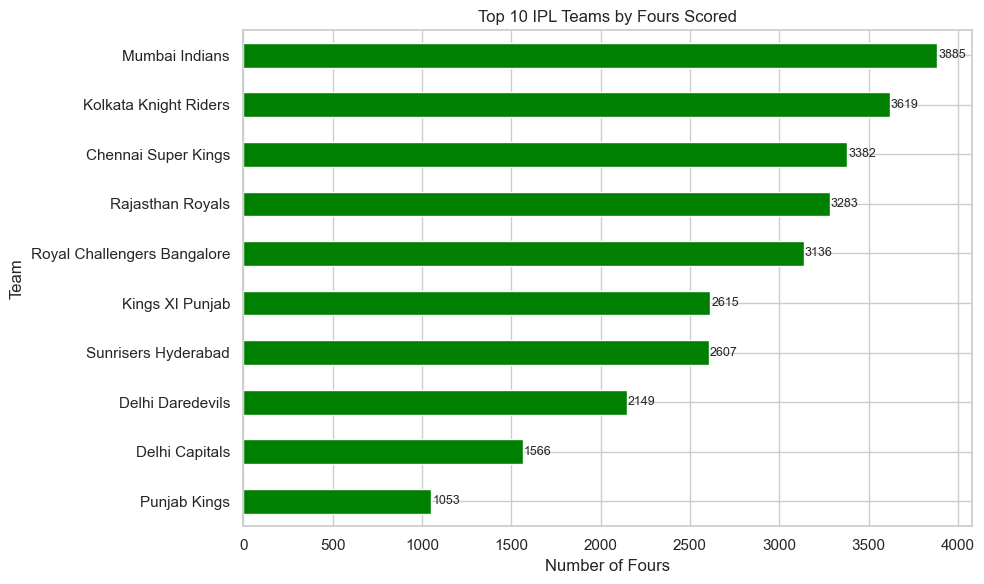

In [112]:
ipl_df = df[df['event_name'].str.contains('IPL|Indian Premier League', case=False, na=False)]
if ipl_df.empty:
    print("No IPL matches found in your dataset.")
else:
    fours_df = ipl_df[
        (ipl_df['runs_batter'] == 4) &
        (ipl_df['runs_not_boundary'] == 0) & 
        (ipl_df['valid_ball'] == 1)
    ]
    team_fours = fours_df.groupby('batting_team').size()
    top10_fours = team_fours.sort_values(ascending=False).head(10).sort_values(ascending=True)
    plt.figure(figsize=(10, 6))
    ax = top10_fours.plot(kind='barh', color='green')
    plt.title('Top 10 IPL Teams by Fours Scored')
    plt.xlabel('Number of Fours')
    plt.ylabel('Team')
    for i, (team, val) in enumerate(top10_fours.items()):
        ax.text(val + 5, i, str(val), va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# Most Sixes by Teams - IPL

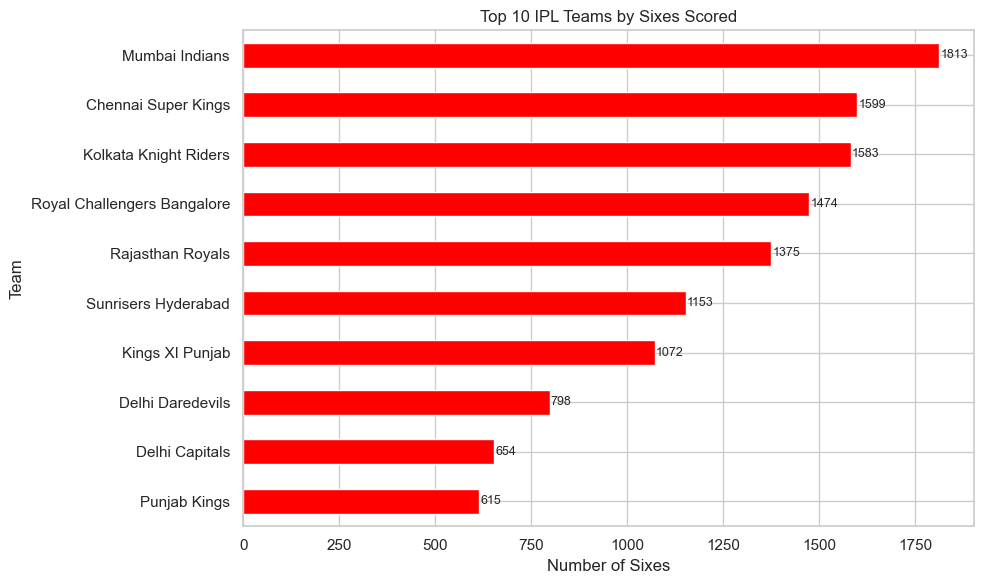

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
ipl_df = df[df['event_name'].str.contains('IPL|Indian Premier League', case=False, na=False)]
if ipl_df.empty:
    print("No IPL matches found in your dataset.")
else:
    sixes_df = ipl_df[
        (ipl_df['runs_batter'] == 6) &
        (ipl_df['runs_not_boundary'] == 0) & 
        (ipl_df['valid_ball'] == 1)
    ]
    team_sixes = sixes_df.groupby('batting_team').size()
    top10_sixes = team_sixes.sort_values(ascending=False).head(10).sort_values(ascending=True)
    plt.figure(figsize=(10, 6))
    ax = top10_sixes.plot(kind='barh', color='red')
    plt.title('Top 10 IPL Teams by Sixes Scored')
    plt.xlabel('Number of Sixes')
    plt.ylabel('Team')
    for i, (team, val) in enumerate(top10_sixes.items()):
        ax.text(val + 3, i, str(val), va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# Total Runs Conceded by Teams While Fielding - IPL 

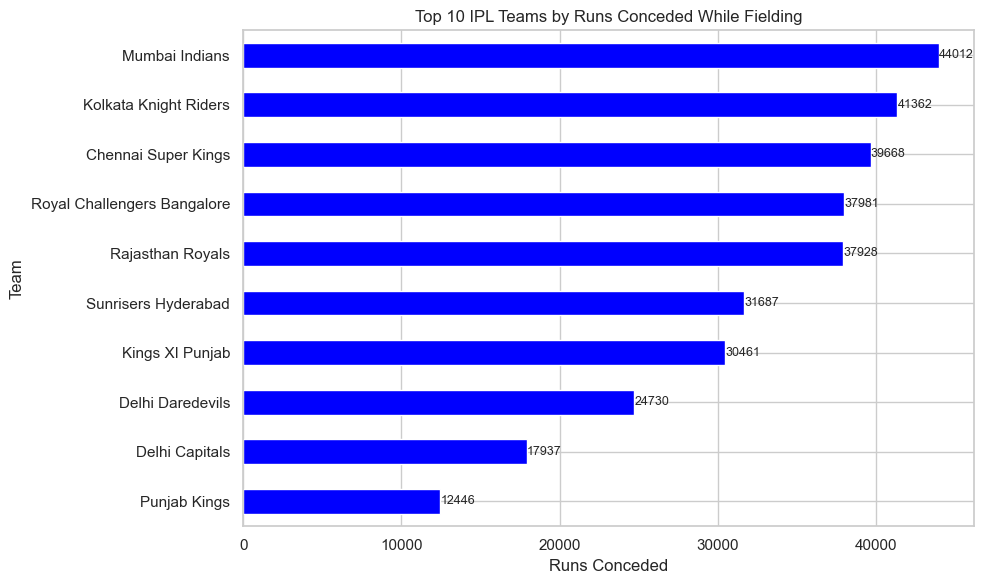

In [114]:
ipl_df = df[df['event_name'].str.contains('IPL|Indian Premier League', case=False, na=False)]
if ipl_df.empty:
    print("No IPL matches found in your dataset.")
else:
    runs_conceded = ipl_df.groupby('bowling_team')['runs_total'].sum()
    runs_conceded_top10 = runs_conceded.sort_values(ascending=False).head(10).sort_values(ascending=True)
    plt.figure(figsize=(10, 6))
    ax = runs_conceded_top10.plot(kind='barh', color='blue')
    plt.title('Top 10 IPL Teams by Runs Conceded While Fielding')
    plt.xlabel('Runs Conceded')
    plt.ylabel('Team')
    for i, (team, val) in enumerate(runs_conceded_top10.items()):
        ax.text(val + 10, i, str(val), va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# Most Wickets by Teams - IPL

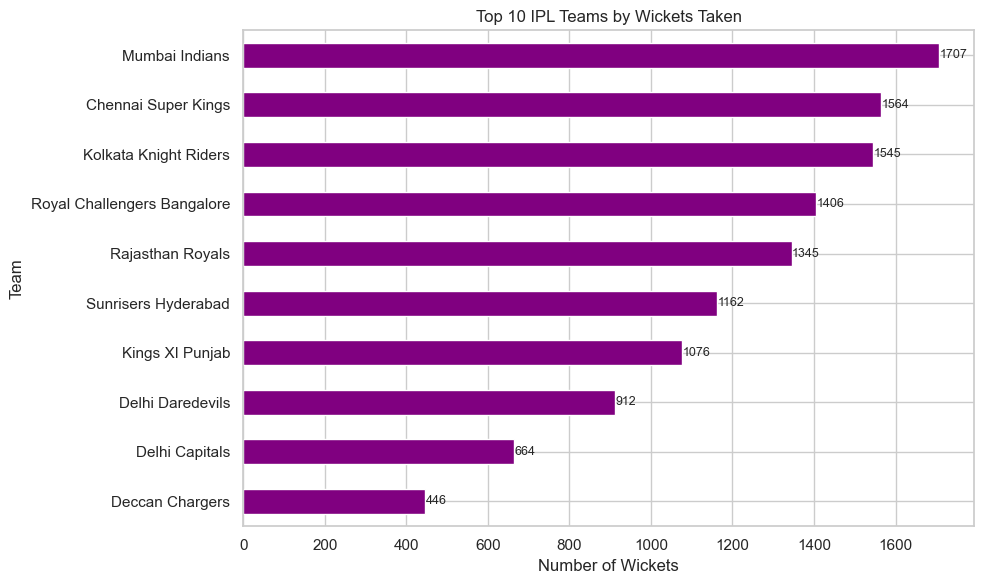

In [115]:
ipl_df = df[df['event_name'].str.contains('IPL|Indian Premier League', case=False, na=False)]
if ipl_df.empty:
    print("No IPL matches found in your dataset.")
else:
    wickets_df = ipl_df[ipl_df['wicket_kind'].notnull() & (ipl_df['wicket_kind'] != '')]
    wickets_by_team = wickets_df.groupby('bowling_team').size()
    top10_wickets = wickets_by_team.sort_values(ascending=False).head(10).sort_values(ascending=True)
    plt.figure(figsize=(10, 6))
    ax = top10_wickets.plot(kind='barh', color='purple')
    plt.title('Top 10 IPL Teams by Wickets Taken')
    plt.xlabel('Number of Wickets')
    plt.ylabel('Team')
    for i, (team, val) in enumerate(top10_wickets.items()):
        ax.text(val + 1, i, str(val), va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# Most Wides Bowled by Teams - IPL

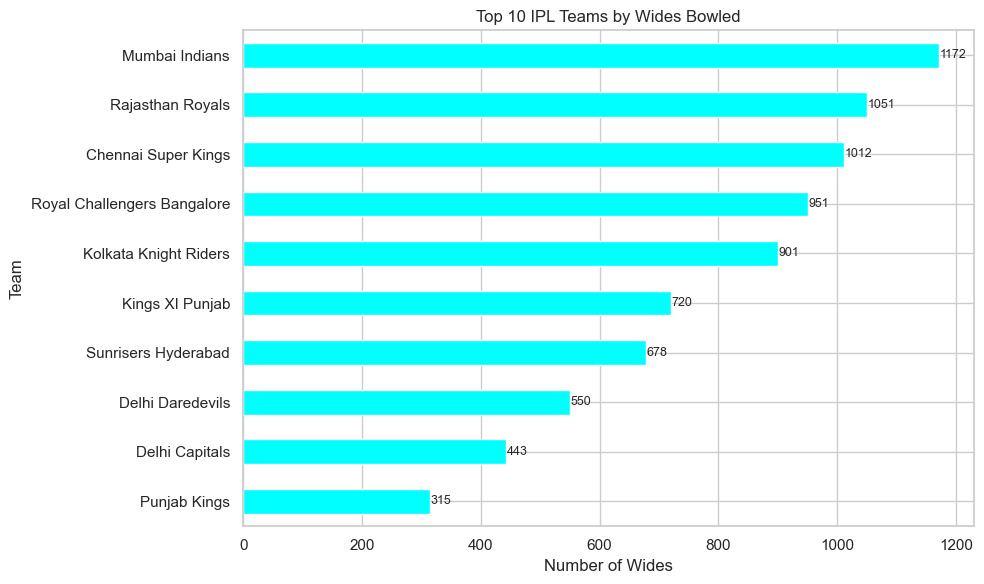

In [116]:
ipl_df = df[df['event_name'].str.contains('IPL|Indian Premier League', case=False, na=False)]
if ipl_df.empty:
    print("No IPL matches found in your dataset.")
else:
    wides_df = ipl_df[ipl_df['extra_type'].str.contains('wides', case=False, na=False)]
    if wides_df.empty:
        print("No wides found in IPL data.")
    else:
        wides_by_team = wides_df.groupby('bowling_team').size()
        top10_wides = wides_by_team.sort_values(ascending=False).head(10).sort_values(ascending=True)
        plt.figure(figsize=(10, 6))
        ax = top10_wides.plot(kind='barh', color='cyan')
        plt.title('Top 10 IPL Teams by Wides Bowled')
        plt.xlabel('Number of Wides')
        plt.ylabel('Team')
        for i, (team, val) in enumerate(top10_wides.items()):
            ax.text(val + 1, i, str(val), va='center', fontsize=9)
        plt.tight_layout()
        plt.show()

# Most Catches by Teams - IPL 

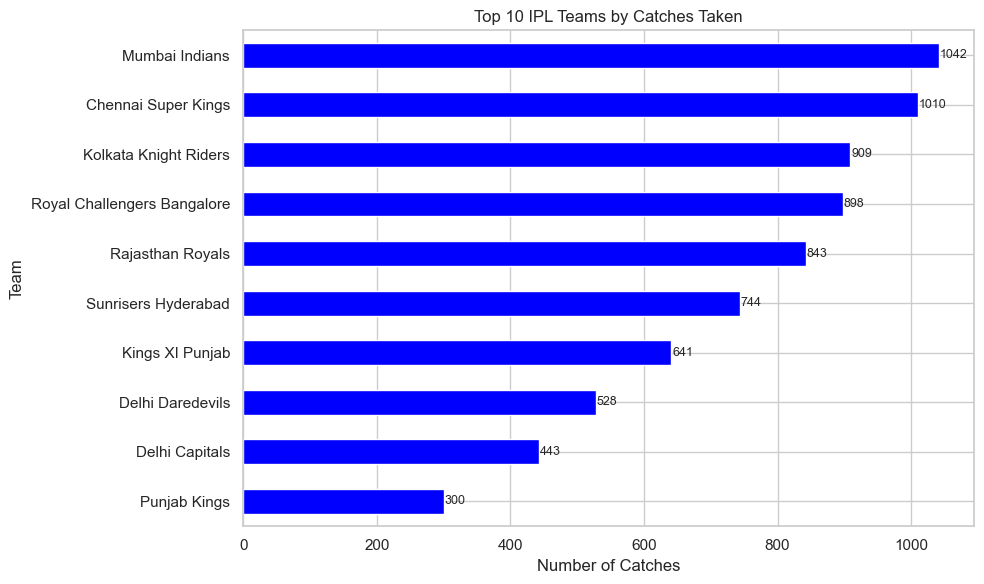

In [117]:
ipl_df = df[df['event_name'].str.contains('IPL|Indian Premier League', case=False, na=False)]
if ipl_df.empty:
    print("No IPL matches found in your dataset.")
else:
    caught_df = ipl_df[ipl_df['wicket_kind'] == 'caught']
    catches_by_team = caught_df.groupby('bowling_team').size()
    top10_catches = catches_by_team.sort_values(ascending=False).head(10).sort_values(ascending=True)
    plt.figure(figsize=(10,6))
    ax = top10_catches.plot(kind='barh', color='blue')
    plt.title('Top 10 IPL Teams by Catches Taken')
    plt.xlabel('Number of Catches')
    plt.ylabel('Team')
    for i, (team, val) in enumerate(top10_catches.items()):
        ax.text(val + 1, i, str(val), va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# IPL Finals Played by Team

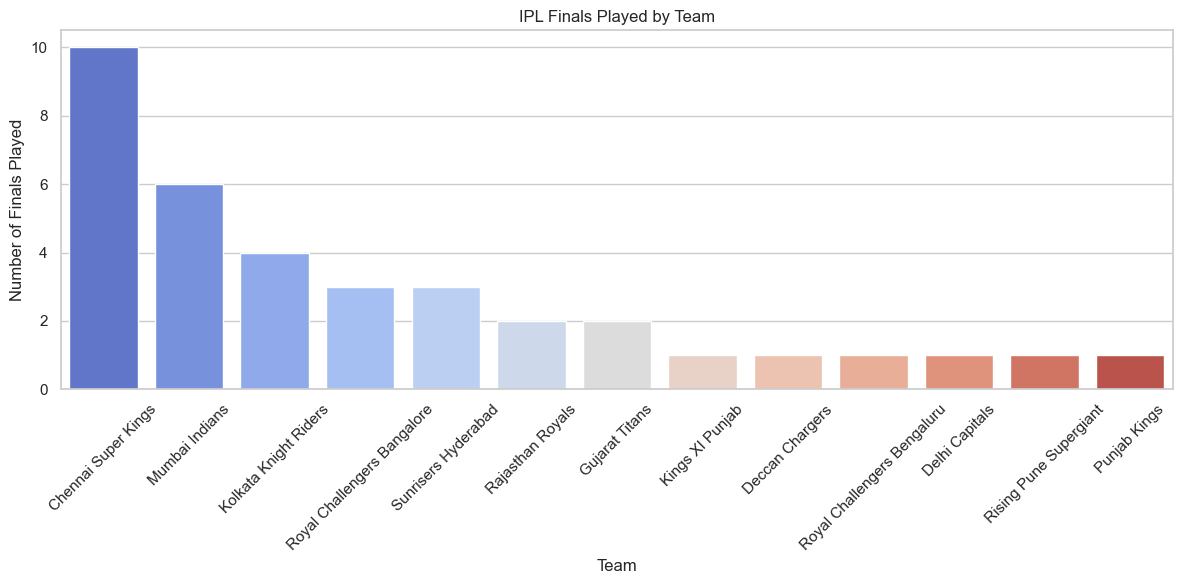

In [118]:
finals = df[df['stage'].str.lower() == 'final']
final_matches = finals.drop_duplicates(subset='match_id')
first_innings = final_matches[final_matches['innings'] == 1]
teams_played = pd.concat([first_innings['batting_team'], first_innings['bowling_team']])
finals_played_count = teams_played.value_counts().reset_index()
finals_played_count.columns = ['team', 'finals_played']
plt.figure(figsize=(12, 6))
sns.barplot(data=finals_played_count, x='team', y='finals_played', palette='coolwarm')
plt.title('IPL Finals Played by Team')
plt.xlabel('Team')
plt.ylabel('Number of Finals Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# IPL Finals Wins by Team

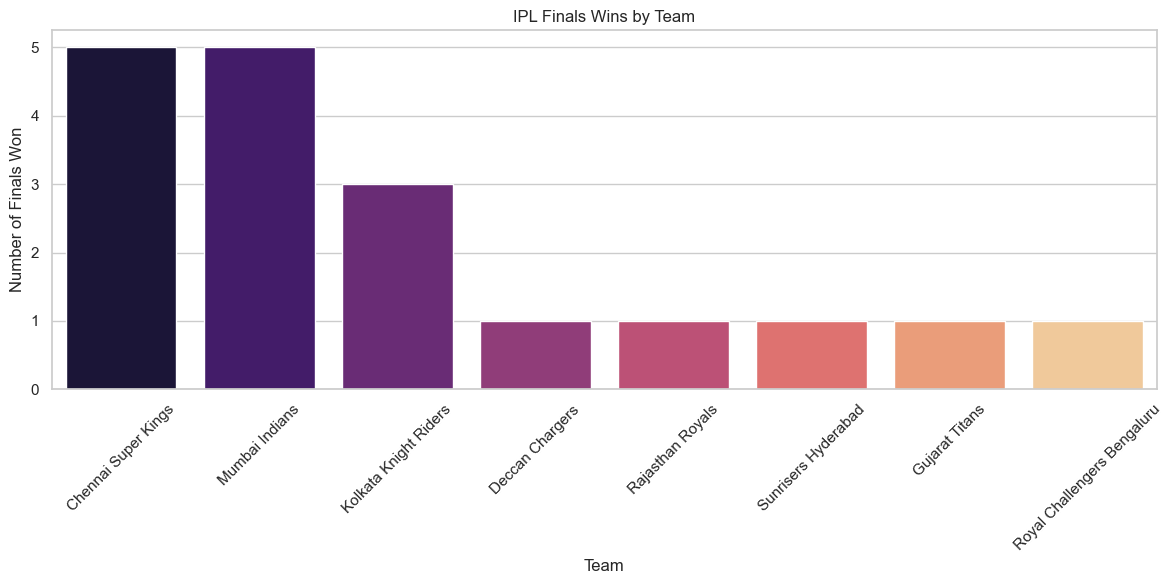

In [119]:
finals = df[df['stage'].str.lower() == 'final']
final_matches = finals.drop_duplicates(subset='match_id')
final_winners = final_matches['match_won_by'].value_counts().reset_index()
final_winners.columns = ['team', 'finals_won']
plt.figure(figsize=(12, 6))
sns.barplot(data=final_winners, x='team', y='finals_won', palette='magma')
plt.title('IPL Finals Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Finals Won')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Batting Friendly Venues (Avg Runs per Match) 

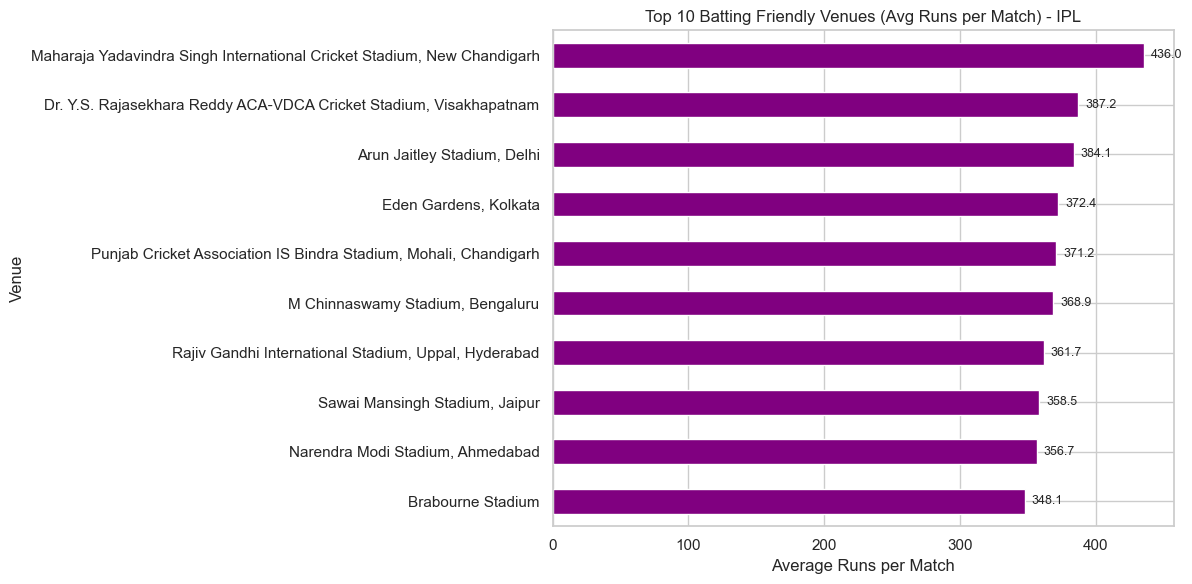

In [120]:
ipl_df = df[df['event_name'].str.contains('IPL|Indian Premier League', case=False, na=False)]
if ipl_df.empty:
    print("No IPL matches found in your dataset.")
else:    
    runs_per_match = ipl_df.groupby(['venue', 'match_id'])['runs_total'].sum().reset_index()
    avg_runs_per_venue = runs_per_match.groupby('venue')['runs_total'].mean()
    top10_venues = avg_runs_per_venue.sort_values(ascending=False).head(10).sort_values(ascending=True)
    plt.figure(figsize=(12, 6))
    ax = top10_venues.plot(kind='barh', color='purple')
    plt.title('Top 10 Batting Friendly Venues (Avg Runs per Match) - IPL')
    plt.xlabel('Average Runs per Match')
    plt.ylabel('Venue')
    for i, (venue, val) in enumerate(top10_venues.items()):
        ax.text(val + 5, i, f"{val:.1f}", va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# Top 10 Bowling Friendly Venues (Lowest Avg Runs Conceded per Match) - IPL 

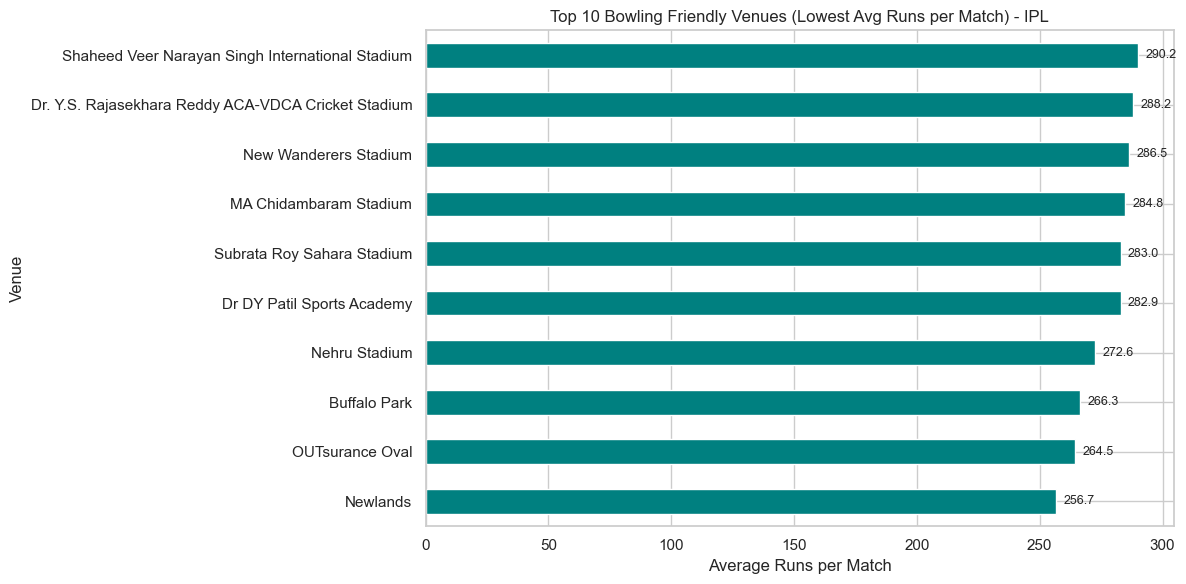

In [121]:
ipl_df = df[df['event_name'].str.contains('IPL|Indian Premier League', case=False, na=False)]
if ipl_df.empty:
    print("No IPL matches found in your dataset.")
else:
    runs_per_match = ipl_df.groupby(['venue', 'match_id'])['runs_total'].sum().reset_index()
    avg_runs_per_venue = runs_per_match.groupby('venue')['runs_total'].mean()
    top10_bowling_venues = avg_runs_per_venue.sort_values(ascending=True).head(10)
    plt.figure(figsize=(12, 6))
    ax = top10_bowling_venues.plot(kind='barh', color='teal')
    plt.title('Top 10 Bowling Friendly Venues (Lowest Avg Runs per Match) - IPL')
    plt.xlabel('Average Runs per Match')
    plt.ylabel('Venue')
    for i, (venue, val) in enumerate(top10_bowling_venues.items()):
        ax.text(val + 3, i, f"{val:.1f}", va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# Top 10 Less Wicket-Friendly Venues (Avg Wickets per Match) - IPL 

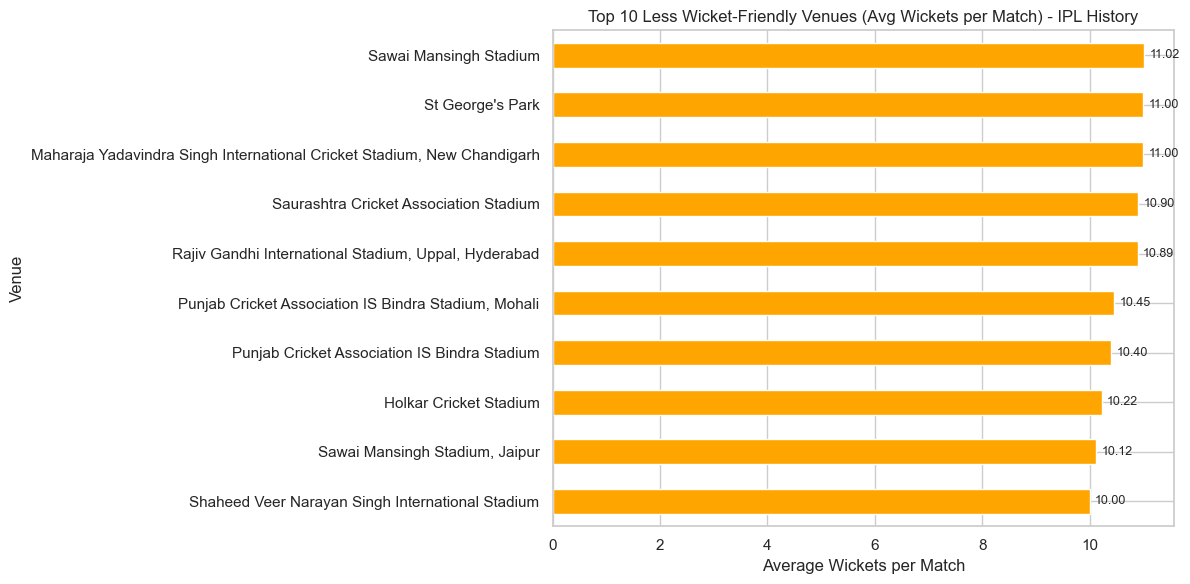

In [122]:
ipl_df = df[df['event_name'].str.contains('IPL|Indian Premier League', case=False, na=False)]
if ipl_df.empty:
    print("No IPL matches found in your dataset.")
else:
    wickets_df = ipl_df[ipl_df['wicket_kind'].notna()]
    wickets_per_match = wickets_df.groupby(['venue', 'match_id']).size().reset_index(name='wickets')
    avg_wickets_per_venue = wickets_per_match.groupby('venue')['wickets'].mean()
    top10_less_wicket_friendly_venues = avg_wickets_per_venue.sort_values(ascending=True).head(10)
    plt.figure(figsize=(12, 6))
    ax = top10_less_wicket_friendly_venues.plot(kind='barh', color='orange')
    plt.title('Top 10 Less Wicket-Friendly Venues (Avg Wickets per Match) - IPL History')
    plt.xlabel('Average Wickets per Match')
    plt.ylabel('Venue')
    for i, (venue, val) in enumerate(top10_less_wicket_friendly_venues.items()):
        ax.text(val + 0.1, i, f"{val:.2f}", va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# Top 10 More Wicket-Friendly Venues (Avg Wickets per Match) - IPL

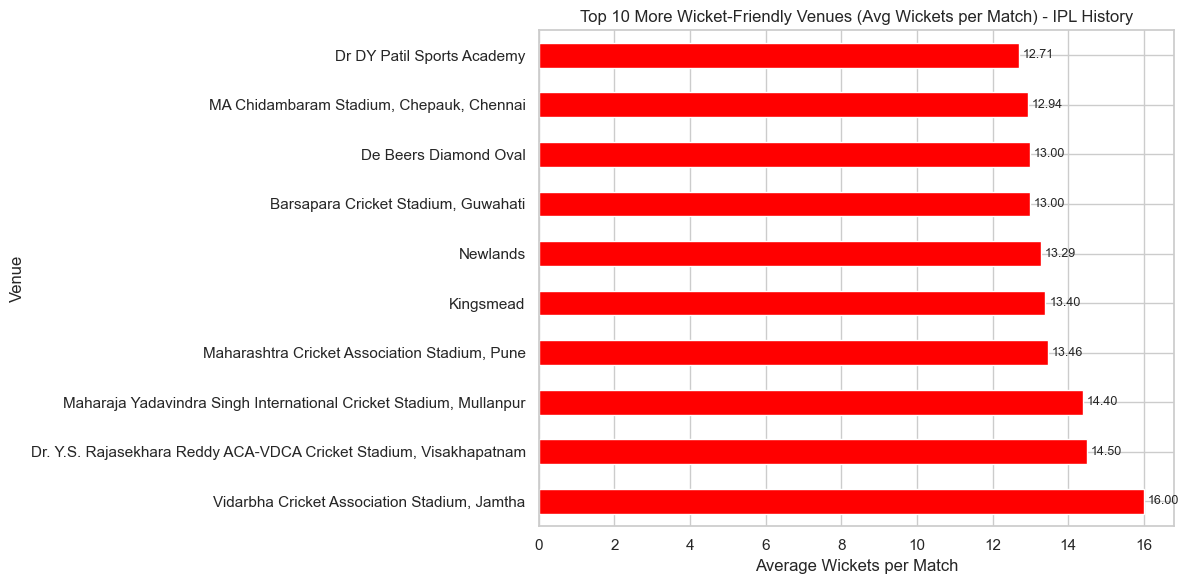

In [123]:
ipl_df = df[df['event_name'].str.contains('IPL|Indian Premier League', case=False, na=False)]
if ipl_df.empty:
    print("No IPL matches found in your dataset.")
else:
    wickets_df = ipl_df[ipl_df['wicket_kind'].notna()]
    wickets_per_match = wickets_df.groupby(['venue', 'match_id']).size().reset_index(name='wickets')
    avg_wickets_per_venue = wickets_per_match.groupby('venue')['wickets'].mean()
    top10_more_wicket_friendly_venues = avg_wickets_per_venue.sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    ax = top10_more_wicket_friendly_venues.plot(kind='barh', color='red')
    plt.title('Top 10 More Wicket-Friendly Venues (Avg Wickets per Match) - IPL History')
    plt.xlabel('Average Wickets per Match')
    plt.ylabel('Venue')
    for i, (venue, val) in enumerate(top10_more_wicket_friendly_venues.items()):
        ax.text(val + 0.1, i, f"{val:.2f}", va='center', fontsize=9)
    plt.tight_layout()
    plt.show()